## Setup

## Data Pre-Processing

In [1]:
#!pip install --upgrade ipykernel
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
#!pip install pyLDAvis
#!pip install spaCy
import nltk
import re
import gensim
import pandas as pd
import numpy as np
import spacy
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

#nltk.download('stopwords')
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')


In [3]:
#read in CSV files
#ROCK
df = pd.read_csv('alternative.csv') #321 songs, 19 features

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'first_artist',
       'all_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist', 'song', 'lyrics',
       'lyrics_cleaned'],
      dtype='object')

In [4]:
final_lyrics = []
all_words = []
df['filtered_lyrics'] = ''


# try:
for each in range(len(df)):
    try:
        cleaned_lyrics = (re.sub(r"[,.:;?'\")(!]\d", ' ', str(df.loc[each,'lyrics_cleaned']))).lower()
    except:
        cleaned_lyrics = 'no'

    lemmatized_lyrics = lemmatizer.lemmatize(cleaned_lyrics)
    tokenized_lyrics = word_tokenize(lemmatized_lyrics)
    filtered_lyrics = [w for w in tokenized_lyrics if not w in stop_words]
    filtered_lyrics = [w for w in filtered_lyrics if len(w) > 2]
    
    for i in filtered_lyrics:
        all_words.append(i)

    final_lyrics.append(filtered_lyrics)

    filtered_lyrics = ' '.join(filtered_lyrics)
    df.loc[each, 'filtered_lyrics'] = filtered_lyrics


In [5]:
df[:10]

,Unnamed: 0,Unnamed: 0.1,id,title,first_artist,all_artists,danceability,energy,key,loudness,...,liveness,valence,tempo,duration_ms,time_signature,artist,song,lyrics,lyrics_cleaned,filtered_lyrics
0,1187,1430,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,['Ed Sheeran'],0.599,0.448,8,-6.312,...,0.1060,0.1680,95.050,263400,3,Ed Sheeran,Perfect,\n\n[Verse 1]\nI found a love for me\nOh darli...,"I found a love for me Oh darling, just div...",found love darling dive right follow lead well...
1,1191,1437,6FZDfxM3a3UCqtzo5pxSLZ,Without Me,Halsey,['Halsey'],0.752,0.488,6,-7.050,...,0.0936,0.5330,136.041,201661,4,Halsey,Without Me,\n\n[Verse 1]\nFound you when your heart was b...,Found you when your heart was broke I fill...,found heart broke filled cup overflowed took f...
2,1192,1441,15xWRPHQMeqgdkGzInx3PY,Falling Like The Stars,James Arthur,['James Arthur'],0.296,0.351,6,-9.538,...,0.1100,0.1900,177.060,212720,3,James Arthur,Falling Like The Stars,"\n\n[Verse 1]\nI swear to God, when I come hom...","I swear to God, when I come home I'm gonna...",swear god come home gon hold close swear god c...
3,1193,1442,3XVBdLihbNbxUwZosxcGuJ,If I Ain't Got You,Alicia Keys,['Alicia Keys'],0.609,0.444,7,-9.129,...,0.1040,0.1660,118.402,228707,3,Alicia Keys,If I Ain't Got You,\n\n[Verse 1]\nSome people live for the fortun...,Some people live for the fortune Some peop...,people live fortune people live fame people li...
4,1194,1446,6Up545NUflOiXo8cEraH49,You Say,Lauren Daigle,['Lauren Daigle'],0.494,0.632,5,-6.890,...,0.0869,0.0797,147.873,274693,4,Lauren Daigle,You Say,\n\n[Verse 1]\nI keep fighting voices in my mi...,I keep fighting voices in my mind that say...,keep fighting voices mind say enough every sin...
5,1197,1449,0IktbUcnAGrvD03AWnz3Q8,Lucky,Jason Mraz,"['Jason Mraz', 'Colbie Caillat']",0.623,0.417,0,-8.699,...,0.1350,0.7210,130.032,191360,4,Jason Mraz,Lucky,"\n\n[Verse 1: Jason Mraz, Colbie Caillat]\nDo ...","[Verse 1: Jason Mraz, Colbie Caillat] Do you...",verse jason mraz colbie caillat hear talking a...
6,1199,1451,4rMNgxEwGWoPHIUcvB5BrB,It Will Rain,Bruno Mars,['Bruno Mars'],0.574,0.824,2,-6.885,...,0.0816,0.4340,149.981,257848,4,Bruno Mars,It Will Rain,"\n\n[Verse 1]\nIf you ever leave me, baby\nLea...","If you ever leave me, baby Leave some morp...",ever leave baby leave morphine door 'cause wou...
7,1200,1455,0KpfYajJVVGgQ32Dby7e9i,"Hey, Soul Sister",Train,['Train'],0.675,0.885,1,-4.432,...,0.0860,0.7680,97.030,216667,4,Train,"Hey, Soul Sister",\n\n[Intro]\nHeyy\nHe-e-e-e-ey\nHe-e-e-e-ey\n\...,Heyy He-e-e-e-ey He-e-e-e-ey Your lipst...,heyy he-e-e-e-ey he-e-e-e-ey lipstick stains f...
8,1201,1459,6700Z4Izi8EbB6JNthU6Ma,Hold Me While You Wait,Lewis Capaldi,['Lewis Capaldi'],0.688,0.530,11,-5.507,...,0.0995,0.1620,106.958,205687,4,Lewis Capaldi,Hold Me While You Wait,"\n\n[Verse 1]\nI'm waitin' up, savin' all my p...","I'm waitin' up, savin' all my precious tim...",waitin savin precious time losin light missin ...
9,1202,1460,1Xi84slp6FryDSCbzq4UCD,Arcade,Duncan Laurence,['Duncan Laurence'],0.450,0.329,9,-12.603,...,0.1350,0.2660,71.884,183624,3,Duncan Laurence,Arcade,\n\n[Verse 1]\nA broken heart is all that's le...,A broken heart is all that's left I'm stil...,broken heart left still fixing cracks lost cou...


## Sklearn topic modeling

In [6]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(df.loc[:, 'filtered_lyrics'])

In [8]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  15.004568135497925 %


In [9]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4,            # Number of topics
                                      max_iter=25,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=102,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', max_iter=25, n_components=4,
                          n_jobs=-1, random_state=102)


In [10]:
# 4
#pyLDAvis.enable_notebook()
#panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
#panel

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -58641.34450261928
Perplexity:  113.371122502793
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 25,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 102,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [12]:
# grid search

# Define Search Param
search_params = {'n_components': [4, 5, 6], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [4, 5, 6]})

In [13]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 4}
Best Log Likelihood Score:  -13070.499594118766
Model Perplexity:  105.9098167101077


In [14]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Song" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
#df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
#df_document_topics

In [15]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
#df_topic_keywords.head()

In [16]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Songs']
df_topic_distribution

,Topic Num,Num Songs
0,2,54
1,3,47
2,1,38
3,0,14


In [17]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  32.097787
3        1.782994 -295.079681       2        1  31.772339
1      220.811432 -343.832123       3        1  24.115312
0       50.533993  -76.050934       4        1  12.014562, topic_info=       Term        Freq       Total Category  logprob  loglift
117     ooh  352.000000  352.000000  Default  30.0000  30.0000
183    yeah  439.000000  439.000000  Default  29.0000  29.0000
175     wan  223.000000  223.000000  Default  28.0000  28.0000
185   young  112.000000  112.000000  Default  27.0000  27.0000
176    want  238.000000  238.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
69    heart   15.401477  117.189230   Topic4  -4.5716   0.0897
2      baby   20.259672  260.015999   Topic4  -4.2974  -0.4331
20   chorus   16.485150  352.021826   Topic4  -4.5036  -0.9422
83     know   15.527041  351.574331   Topic4  -4.5635  -1.0008
55      gon   13.829960  170.373859   Topic4  -4.6792  -0.3921

[225 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.749100  alright
0         2  0.057623  alright
0         3  0.086435  alright
0         4  0.086435  alright
1         1  0.017197     away
...     ...       ...      ...
183       4  0.018192     yeah
184       1  0.931335      yes
184       3  0.074507      yes
185       3  0.615925    young
185       4  0.374911    young

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [18]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=30)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29
Topic 0,ooh,good,young,got,love,make,like,dance,say,broke,...,forget,guess,home,chorus,know,heart,mind,said,break,gon
Topic 1,yeah,got,like,feel,gon,love,chorus,time,young,cause,...,song,heart,good,til,hard,bridge,whoa,party,god,boy
Topic 2,like,hey,know,chorus,love,let,life,cause,say,said,...,make,want,man,bridge,bitch,heart,yeah,right,got,home
Topic 3,wan,want,baby,way,love,know,chorus,say,away,cause,...,walk,sorry,let,hold,yeah,bridge,time,getting,post,fall


In [19]:
# # Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# # Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# # X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# # Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# # Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.12  0.38  0.65  0.65]
 [-0.02 -0.33  0.76 -0.56]]
Perc of Variance Explained: 
 [0.05 0.44]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

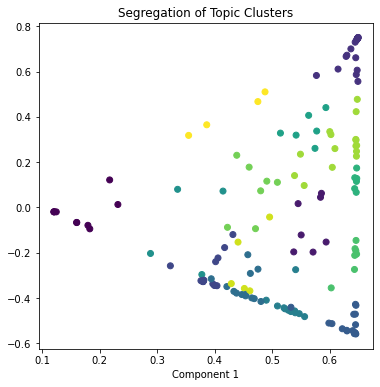

In [20]:
# # Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )
#plt.legend(loc="upper left")

In [21]:
df_post_topic = pd.concat([df,df_document_topic.reset_index(drop = True)], axis = 1)
#df_post_topic.head()

## Sentiment Analysis

In [22]:
#!pip install vaderSentiment

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [24]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [25]:
df_post_topic.loc[:,'sentiment'] = df_post_topic.loc[:,'filtered_lyrics'].map(lambda x:sentiment_analyzer_scores(x))

In [26]:
df_post_topic.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'first_artist',
       'all_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist', 'song', 'lyrics',
       'lyrics_cleaned', 'filtered_lyrics', 'Topic0', 'Topic1', 'Topic2',
       'Topic3', 'dominant_topic', 'sentiment'],
      dtype='object')

In [27]:
#df_post_topic = df.copy()
#df_post_topic['dominant_topic'] = dominant_topic

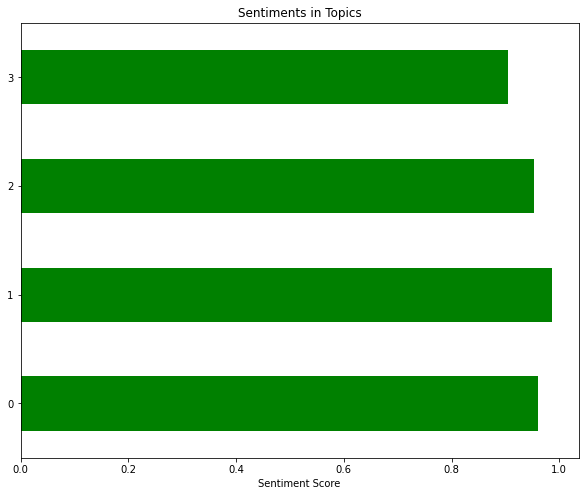

In [28]:
import numpy as np
plt.figure(figsize=(10,8))
df_post_topic.groupby('dominant_topic')['sentiment'].median().plot(kind='barh', color=(df_post_topic.groupby('dominant_topic')['sentiment'].mean() > 0).map({True: 'g',False: 'r'}));
plt.xlabel('Sentiment Score');
plt.ylabel('');
plt.title('Sentiments in Topics');
#plt.yticks(np.arange(4), ('Explicit','Love/Emotional','Reflective/Upbeat','Breakfree/Celebrating Yourself'));

In [29]:
df_post_topic.to_csv('data_with_topic_and_sentiment.csv', index = False)

In [30]:
import pandas as pd
df = pd.read_csv('data_with_topic_and_sentiment.csv')

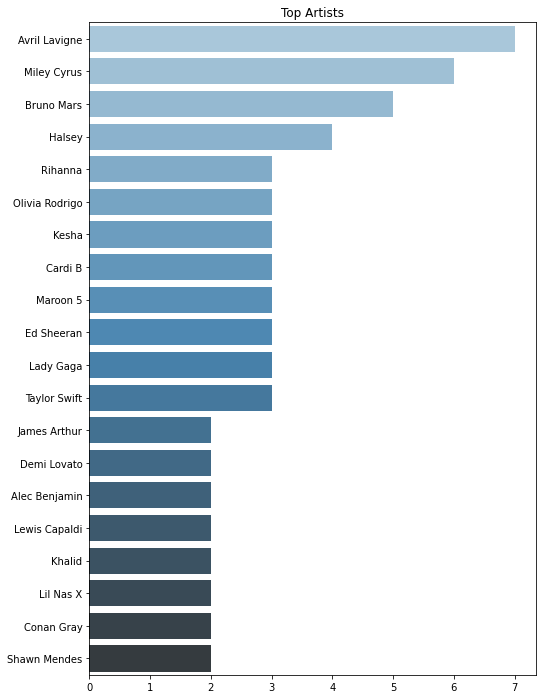

In [31]:
import seaborn as sns; 
plt.figure(figsize=(8,12))
plt.title("Top Artists")
ax = sns.barplot(y=df['first_artist'].value_counts()[:20].index, x=df['first_artist'].value_counts()[:20].values, palette="Blues_d", orient='h')

In [32]:
# word cloud
from nltk.util import ngrams
from collections import Counter

unigram = Counter(ngrams(all_words, 1))
output = pd.DataFrame.from_dict(unigram, orient='index').reset_index()

output.columns = ['Word', 'Count']
output = output.sort_values(by = ['Count'], ascending = False)
for each in range(len(output)):
    output.loc[each,'Word'] = str(output.loc[each,'Word'])[2:-3]
output.reset_index(inplace = True)
output = output.drop('index', axis = 1)
output.to_csv('ngram.csv')
output['Word'][:10]

0       n't
1      like
2       're
3      yeah
4      love
5      know
6       'll
7       got
8    'cause
9      baby
Name: Word, dtype: object

In [33]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'first_artist',
       'all_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist', 'song', 'lyrics',
       'lyrics_cleaned', 'filtered_lyrics', 'Topic0', 'Topic1', 'Topic2',
       'Topic3', 'dominant_topic', 'sentiment'],
      dtype='object')

## TF-IDF

In [34]:
df_post_topic = df.copy()
df_post_topic.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'first_artist',
       'all_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'artist', 'song', 'lyrics',
       'lyrics_cleaned', 'filtered_lyrics', 'Topic0', 'Topic1', 'Topic2',
       'Topic3', 'dominant_topic', 'sentiment'],
      dtype='object')

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/caseyscomputer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/caseyscomputer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
cv=CountVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1,2), stop_words='english', max_features=1250)
word_count_vector=cv.fit_transform(df_post_topic.filtered_lyrics.values)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(word_count_vector)


# Recommender - based on lyrics


In [37]:
#based on TF-IDF user inputs a song and we give them recommendations
from sklearn.metrics.pairwise import linear_kernel

#index = the songs index
#make more user friendly
index=10
cosine_similarities = linear_kernel(tf_idf_vector[index:index+1], tf_idf_vector).flatten()
related_song_indices = cosine_similarities.argsort()[:-6:-1]
recom=list(related_song_indices)

print('Song I want recommendations for:')
print(df_post_topic['title'][index:index+1])
print(' ')
print(' ')
print('Recommendations:')
print(' ')
for i in recom:
  print(df_post_topic.iloc[[i]][['title', 'first_artist']] )


Song I want recommendations for:
10    Say Something
Name: title, dtype: object
 
 
Recommendations:
 
            title       first_artist
10  Say Something  A Great Big World
    title   first_artist
85  Bored  Billie Eilish
                 title first_artist
127  Dancing On My Own  Calum Scott
       title    first_artist
36  good 4 u  Olivia Rodrigo
     title   first_artist
4  You Say  Lauren Daigle


# Feature Importance

In [38]:
new_df = df.copy()
new_df[:3]
new_df.drop(columns=['song','artist','Unnamed: 0','id','title','first_artist','all_artists','lyrics','time_signature','lyrics_cleaned','filtered_lyrics'], inplace = True)

In [39]:
new_df.columns

Index(['Unnamed: 0.1', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'Topic0', 'Topic1', 'Topic2', 'Topic3', 'dominant_topic',
       'sentiment'],
      dtype='object')

In [40]:
new_df['danceability'] = np.log(new_df['danceability'])
new_df['duration_ms'] = new_df['duration_ms']/60000
new_df['sentiment_positive'] = (new_df['sentiment']>0.7).astype(int)
new_df['sentiment_negative'] = (new_df['sentiment']<-0.7).astype(int)
new_df['sentiment_neutral'] = (~(new_df['sentiment_positive'] | new_df['sentiment_negative'])).astype(int)
new_df = new_df[~new_df.isin([np.nan, np.inf, -np.inf]).any(1)]
new_df.head()

,Unnamed: 0.1,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,...,duration_ms,Topic0,Topic1,Topic2,Topic3,dominant_topic,sentiment,sentiment_positive,sentiment_negative,sentiment_neutral
0,1430,-0.512494,0.448,8,-6.312,1,0.163,0.000000,0.1060,0.1680,...,4.390000,0.01,0.01,0.98,0.01,2,0.9979,1,0,-2
1,1437,-0.285019,0.488,6,-7.050,1,0.297,0.000009,0.0936,0.5330,...,3.361017,0.07,0.33,0.00,0.60,3,-0.8833,0,1,-2
2,1441,-1.217396,0.351,6,-9.538,1,0.823,0.000001,0.1100,0.1900,...,3.545333,0.00,0.51,0.42,0.06,1,0.9984,1,0,-2
3,1442,-0.495937,0.444,7,-9.129,1,0.603,0.000007,0.1040,0.1660,...,3.811783,0.10,0.21,0.00,0.69,3,0.9861,1,0,-2
4,1446,-0.705220,0.632,5,-6.890,1,0.682,0.000000,0.0869,0.0797,...,4.578217,0.01,0.01,0.87,0.12,2,0.8750,1,0,-2


## can change y variable depending on which attribute you want to predict feature importance

In [41]:
y = new_df['danceability']
X = new_df.loc[:,new_df.columns != 'danceability']
# X.drop(columns = ['followers','artist_popularity','Topic0','Topic1', 'Topic2', 'Topic3','dominant_topic','sentiment','sentiment_positive','sentiment_negative','sentiment_neutral'],inplace = True)

## predictive model

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=500)
regr.fit(X, y)

r2_score(y, regr.predict(X), sample_weight=None)

0.9092406853850123

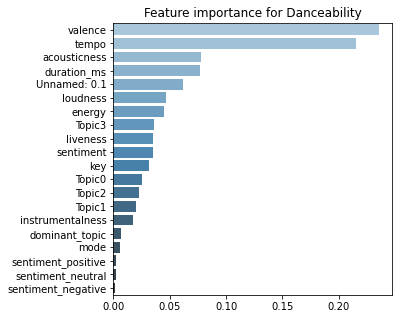

In [43]:
# Feature importannce
import seaborn as sns; 
ft_imp = pd.Series(data=regr.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(5,5))
plt.title("Feature importance for Danceability")
ax = sns.barplot(y=ft_imp.index, x=ft_imp.values, palette="Blues_d", orient='h')

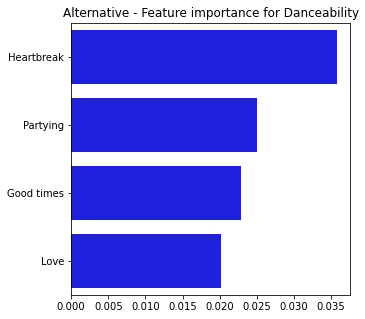

In [51]:
# Feature importannce 
ft_imp = pd.Series(data=regr.feature_importances_, index=X.columns).sort_values(ascending=False)

ft_imp2 = ft_imp.sort_index(ascending=False)
ft_imp2 = ft_imp2[16:].sort_values(ascending=False)

plt.figure(figsize=(5,5))
plt.title("Alternative - Feature importance for Danceability")
ax = sns.barplot(y=ft_imp2.index, x=ft_imp2.values, color="Blue", orient='h')
plt.yticks(np.arange(4), ('Heartbreak','Partying','Good times','Love'));